In [8]:
import sys
sys.path.append("..")

In [12]:
from pathlib import Path

import pandas as pd
import seaborn as sns

from transformers import TrainerState

from src.models import get_best_checkpoint

In [16]:
pwd

'/Users/jon/Projects/ideal-word-representations'

In [22]:
all_model_dirs = Path("outputs/models").glob("*/*")
checkpoints = [Path(get_best_checkpoint(d)) for d in all_model_dirs if not d.stem.startswith(".")]

In [23]:
trainer_states = [TrainerState.load_from_json(c / "trainer_state.json") for c in checkpoints]

In [25]:
log_df = pd.concat([pd.DataFrame(trainer_state.log_history) for trainer_state in trainer_states],
                   keys=[c.parent for c in checkpoints], names=["checkpoint"])
log_df

epoch  learning_rate    loss  step  eval_loss   
checkpoint                                                                    
out/ce_model_phoneme_6_32 0    0.00       0.000999  0.1947     1        NaN  \
                          1    0.02       0.000989  0.0583    10        NaN   
                          2    0.04       0.000978 -0.1444    20        NaN   
                          3    0.07       0.000966  0.2193    30        NaN   
                          4    0.09       0.000955 -0.2544    40        NaN   
...                             ...            ...     ...   ...        ...   
out/ce_model_phoneme_6_8  7    0.16       0.000092  0.1110    70        NaN   
                          8    0.18       0.000091  0.3508    80        NaN   
                          9    0.20       0.000090  0.0396    90        NaN   
                          10   0.22       0.000089 -0.1693   100        NaN   
                          11   0.22            NaN     NaN   100  -0.293459   

                              eval_runtime  eval_samples_per_second   
checkpoint                                                            
out/ce_model_phoneme_6_32 0            NaN                      NaN  \
                          1            NaN                      NaN   
                          2            NaN                      NaN   
                          3            NaN                      NaN   
                          4            NaN                      NaN   
...                                    ...                      ...   
out/ce_model_phoneme_6_8  7            NaN                      NaN   
                          8            NaN                      NaN   
                          9            NaN                      NaN   
                          10           NaN                      NaN   
                          11       21.1921                   74.603   

                              eval_steps_per_second  
checkpoint                                           
out/ce_model_phoneme_6_32 0                     NaN  
                          1                     NaN  
                          2                     NaN  
                          3                     NaN  
                          4                     NaN  
...                                             ...  
out/ce_model_phoneme_6_8  7                     NaN  
                          8                     NaN  
                          9                     NaN  
                          10                    NaN  
                          11                  9.343  

[157 rows x 8 columns]

In [32]:
log_df_long = log_df.reset_index().melt(id_vars=["checkpoint", "step"], value_vars=["loss", "eval_loss"])
log_df_long

,checkpoint,step,variable,value
0,out/ce_model_phoneme_6_32,1,loss,0.194700
1,out/ce_model_phoneme_6_32,10,loss,0.058300
2,out/ce_model_phoneme_6_32,20,loss,-0.144400
3,out/ce_model_phoneme_6_32,30,loss,0.219300
4,out/ce_model_phoneme_6_32,40,loss,-0.254400
...,...,...,...,...
309,out/ce_model_phoneme_6_8,70,eval_loss,NaN
310,out/ce_model_phoneme_6_8,80,eval_loss,NaN
311,out/ce_model_phoneme_6_8,90,eval_loss,NaN
312,out/ce_model_phoneme_6_8,100,eval_loss,NaN


/Users/jon/miniforge3/envs/explore310/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


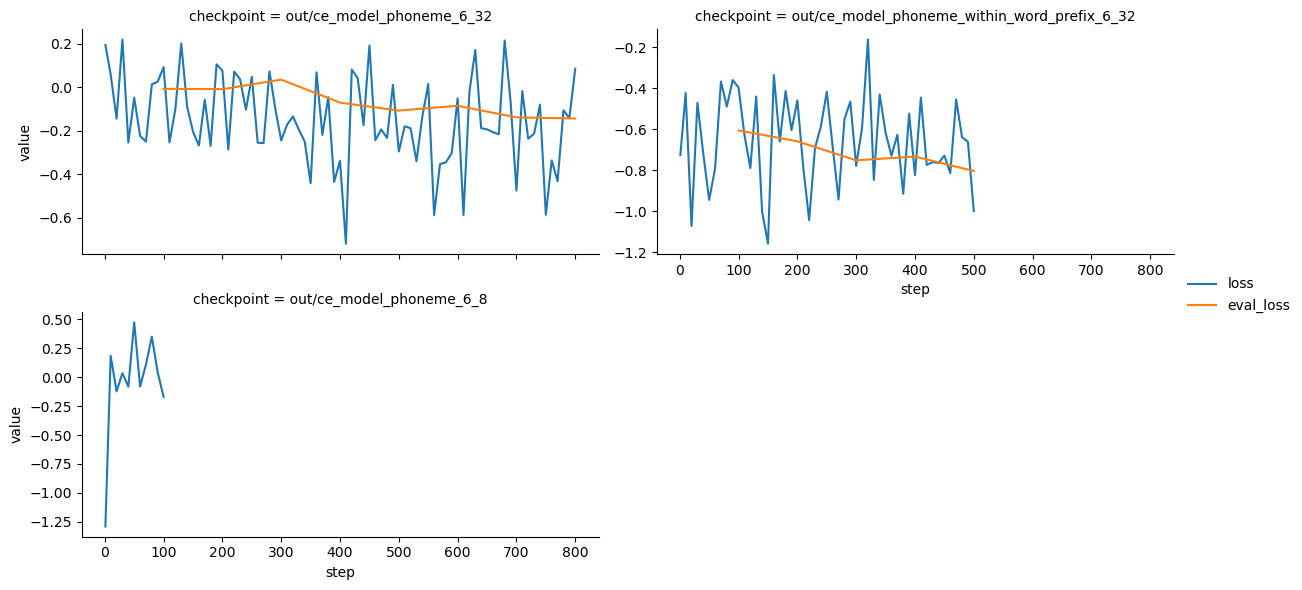

In [36]:
# Plot training and validation loss for all models
g = sns.FacetGrid(log_df_long, col="checkpoint", col_wrap=2, aspect=2, sharey=False)
g.map(sns.lineplot, "step", "value", "variable")
g.add_legend()